<a href="https://colab.research.google.com/github/Untick/NetOptik/blob/Polyakov-Alexander-branch/Polyakov%20Alexander/Classification_of_eyeglass_frames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация оправ очков

## Установка библиотек

In [53]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

from keras.preprocessing.image import ImageDataGenerator

## Подключение диска

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
DATASET_PATH='/content/drive/MyDrive/AI/datasets/plastIron/'

## Загрузка дадасета

In [19]:
x_data = []
y_data = []

data_directories = [(DATASET_PATH + 'iron/', 0), (DATASET_PATH + 'plastic/', 1)]

for directory, label in data_directories:
    for file in os.listdir(directory):
      img = np.array(load_img(directory + file, target_size=(128, 64)))
      x_data.append(img)
      y_data.append(label)
x_data = np.array(x_data)
y_data = np.array(y_data)

shape

In [20]:
print(x_data.shape)
print(y_data.shape)

(918, 128, 64, 3)
(918,)


show images

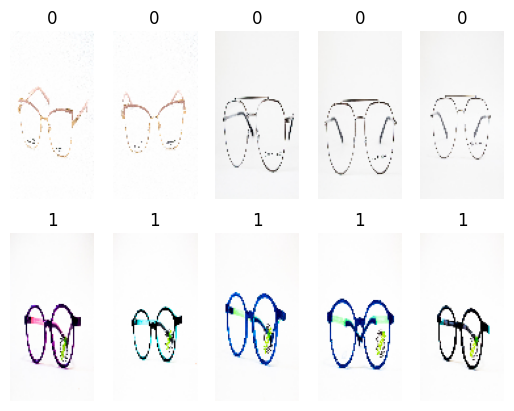

In [21]:
x1 = 5  # Количество первых изображений для вывода
x2 = 5  # Количество последних изображений для вывода

# Вывод первых x1 изображений
for i in range(x1):
    plt.subplot(2, x1, i + 1)
    plt.imshow(x_data[i])
    plt.axis('off')
    plt.title(y_data[i])

# Вывод последних x2 изображений
for i in range(x2):
    index = -(i + 1)
    plt.subplot(2, x2, x1 + i + 1)
    plt.imshow(x_data[index])
    plt.title(y_data[index])
    plt.axis('off')

plt.show()

reshape images

split dataset

In [23]:
x_train, x_val, y_train, y_val = train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=3)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(734, 128, 64, 3)
(184, 128, 64, 3)
(734,)
(184,)


## Обучение модели

### Простая модель

In [38]:
x_data_reshaped = x_data.reshape(-1, 128 * 64 * 3) / 255.
print(x_data_reshaped.shape)

(918, 24576)


In [46]:
x_train, x_val, y_train, y_val = train_test_split(x_data_reshaped,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=3)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(734, 24576)
(184, 24576)
(734,)
(184,)


In [40]:
model = Sequential()
model.add(Dense(2000, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 2000)              258000    
                                                                 
 dense_8 (Dense)             (None, 500)               1000500   
                                                                 
 dense_9 (Dense)             (None, 1)                 501       
                                                                 
Total params: 1,259,001
Trainable params: 1,259,001
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
8/8 [==============================] - 13s 2s/step - loss: 1.9952 - accuracy: 0.5668 - val_loss: 0.6286 - val_accuracy: 0.6304
Epoch 2/50
8/8 [==============================] - 12s 2s/step - loss: 0.6867 - accuracy: 0.5763 - val_loss: 0.6034 - val_accuracy: 0.6739
Epoch 3/50
8/8 [==============================] - 13s 2s/step - loss: 0.5597 - accuracy: 0.6935 - val_loss: 0.5040 - val_accuracy: 0.7663
Epoch 4/50
8/8 [==============================] - 9s 1s/step - loss: 0.4530 - accuracy: 0.8256 - val_loss: 0.4002 - val_accuracy: 0.8261
Epoch 5/50
8/8 [==============================] - 11s 1s/step - loss: 0.3823 - accuracy: 0.8610 - val_loss: 0.3603 - val_accuracy: 0.8587
Epoch 6/50
8/8 [==============================] - 12s 1s/step - loss: 0.3743 - accuracy: 0.8420 - val_loss: 0.4960 - val_accuracy: 0.7826
Epoch 7/50
8/8 [==============================] - 11s 1s/step - loss: 0.4196 - accuracy: 0.8038 - val_loss: 0.3672 - val_accuracy: 0.8533
Epoch 8/50
8/8 [===================

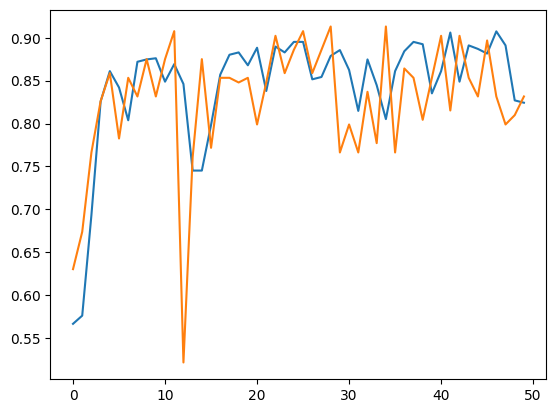

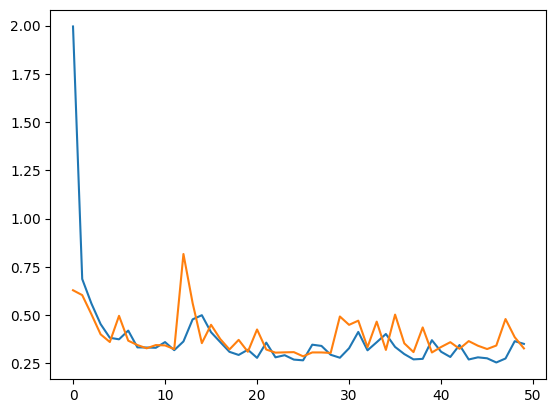

In [ ]:
epochs = 50
batch_size = 100

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = epochs, batch_size = batch_size)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

### Простая модель с большим количеством эпох

In [41]:
x_data_reshaped = x_data.reshape(-1, 128 * 64 * 3) / 255.
print(x_data_reshaped.shape)

(918, 24576)


In [48]:
x_train, x_val, y_train, y_val = train_test_split(x_data_reshaped,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=3)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(734, 24576)
(184, 24576)
(734,)
(184,)


In [49]:
model = Sequential()
model.add(Dense(2000, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2000)              49154000  
                                                                 
 dense_11 (Dense)            (None, 500)               1000500   
                                                                 
 dense_12 (Dense)            (None, 1)                 501       
                                                                 
Total params: 50,155,001
Trainable params: 50,155,001
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
8/8 [==============================] - 12s 1s/step - loss: 37.7309 - accuracy: 0.5014 - val_loss: 0.6395 - val_accuracy: 0.5217
Epoch 2/100
8/8 [==============================] - 11s 1s/step - loss: 4.8448 - accuracy: 0.5450 - val_loss: 8.3662 - val_accuracy: 0.4783
Epoch 3/100
8/8 [==============================] - 9s 1s/step - loss: 6.8263 - accuracy: 0.5259 - val_loss: 6.8837 - val_accuracy: 0.4783
Epoch 4/100
8/8 [==============================] - 11s 1s/step - loss: 5.8393 - accuracy: 0.5082 - val_loss: 8.4205 - val_accuracy: 0.4783
Epoch 5/100
8/8 [==============================] - 11s 1s/step - loss: 4.3905 - accuracy: 0.4768 - val_loss: 2.6402 - val_accuracy: 0.4783
Epoch 6/100
8/8 [==============================] - 9s 1s/step - loss: 1.5922 - accuracy: 0.5327 - val_loss: 0.5932 - val_accuracy: 0.6250
Epoch 7/100
8/8 [==============================] - 11s 1s/step - loss: 0.8722 - accuracy: 0.5545 - val_loss: 0.8686 - val_accuracy: 0.5217
Epoch 8/100
8/8 [===========

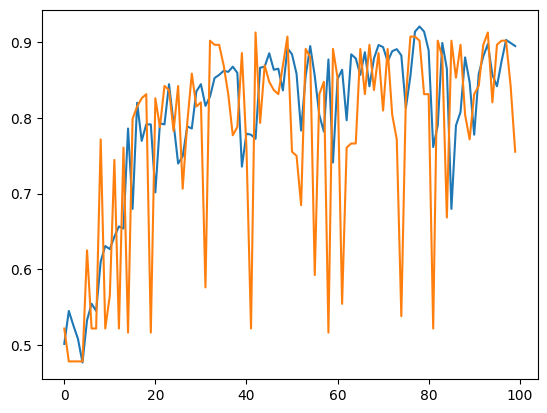

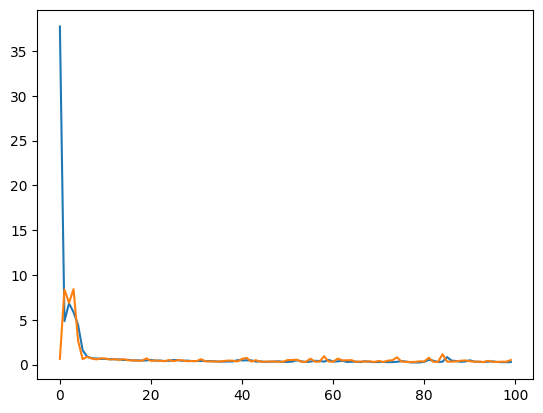

In [ ]:
epochs = 100
batch_size = 100

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = epochs, batch_size = batch_size)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

Вывод: на графики видна "пила" необходимо провести эксперимент с изменением архитектуры сети

### Простамя Модель 2

были добавлены слои BatchNormalization и Dropout

In [50]:
x_data_reshaped = x_data.reshape(-1, 128 * 64 * 3) / 255.
print(x_data_reshaped.shape)

(918, 24576)


In [52]:
x_train, x_val, y_train, y_val = train_test_split(x_data_reshaped,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=3)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(734, 24576)
(184, 24576)
(734,)
(184,)


In [11]:
model = Sequential()
model.add(BatchNormalization(input_shape=(x_train.shape[1], )))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 24576)            98304     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 512)               12583424  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                        

Epoch 1/200
5/8 [=================>............] - ETA: 0s - loss: 1.6550 - accuracy: 0.6460 
Epoch 1: val_accuracy improved from -inf to 0.47826, saving model to /content/drive/MyDrive/AI/datasets/plastIron/best_models/best_model_ex_2.h5
8/8 [==============================] - 10s 299ms/step - loss: 1.6021 - accuracy: 0.6866 - val_loss: 5.1845 - val_accuracy: 0.4783
Epoch 2/200
5/8 [=================>............] - ETA: 0s - loss: 1.5621 - accuracy: 0.7560
Epoch 2: val_accuracy did not improve from 0.47826
8/8 [==============================] - 0s 20ms/step - loss: 1.4369 - accuracy: 0.7643 - val_loss: 8.6023 - val_accuracy: 0.4783
Epoch 3/200
5/8 [=================>............] - ETA: 0s - loss: 1.3399 - accuracy: 0.8100
Epoch 3: val_accuracy did not improve from 0.47826
8/8 [==============================] - 0s 28ms/step - loss: 1.5532 - accuracy: 0.7902 - val_loss: 7.9945 - val_accuracy: 0.4783
Epoch 4/200
5/8 [=================>............] - ETA: 0s - loss: 1.1239 - accuracy: 0

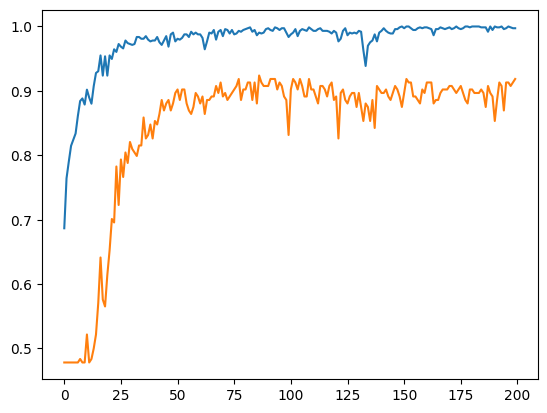

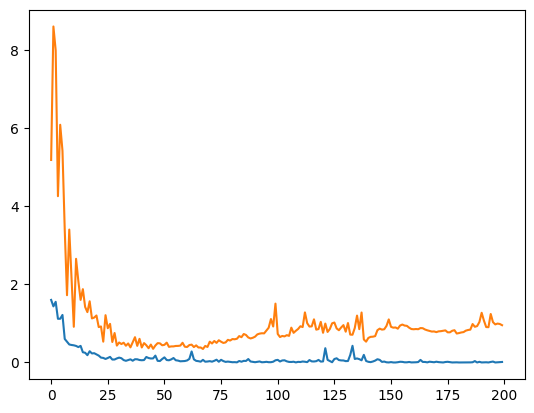

In [12]:
epochs = 200
batch_size = 100

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint(DATASET_PATH + "best_models/" + 'best_model_ex_2.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs = epochs,
    batch_size = batch_size,
    callbacks=[checkpoint]
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

Вывод: лучший результат на тестовой выборке 0.92391

### Модель 3 со сверточными слоями

были добавлены сверточные слои

In [27]:
x_train, x_val, y_train, y_val = train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=3)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(734, 128, 64, 3)
(184, 128, 64, 3)
(734,)
(184,)


In [34]:
model = Sequential()

# Первый сверточный слой
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Второй сверточный слой
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Преобразование матрицы признаков в вектор
model.add(Flatten())

# Полносвязные слои
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout для борьбы с переобучением
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 126, 62, 32)       896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 61, 29, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 26880)             0         
                                                                 
 dense_5 (Dense)             (None, 128)             

Epoch 1/200
8/8 [==============================] - ETA: 0s - loss: 214.7115 - accuracy: 0.5163
Epoch 1: val_accuracy improved from -inf to 0.67935, saving model to /content/drive/MyDrive/AI/datasets/plastIron/best_models/best_model_ex_conv_3.h5
8/8 [==============================] - 8s 141ms/step - loss: 214.7115 - accuracy: 0.5163 - val_loss: 2.5049 - val_accuracy: 0.6793
Epoch 2/200
7/8 [=========================>....] - ETA: 0s - loss: 4.9714 - accuracy: 0.6500
Epoch 2: val_accuracy did not improve from 0.67935
8/8 [==============================] - 0s 24ms/step - loss: 4.7531 - accuracy: 0.6621 - val_loss: 0.9484 - val_accuracy: 0.6739
Epoch 3/200
7/8 [=========================>....] - ETA: 0s - loss: 0.5871 - accuracy: 0.7571
Epoch 3: val_accuracy improved from 0.67935 to 0.77174, saving model to /content/drive/MyDrive/AI/datasets/plastIron/best_models/best_model_ex_conv_3.h5
8/8 [==============================] - 0s 41ms/step - loss: 0.5907 - accuracy: 0.7520 - val_loss: 0.4887 -

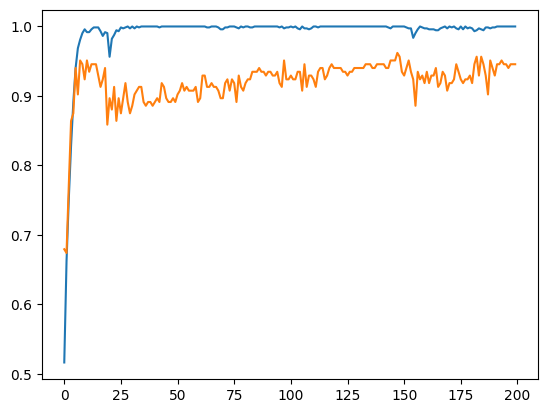

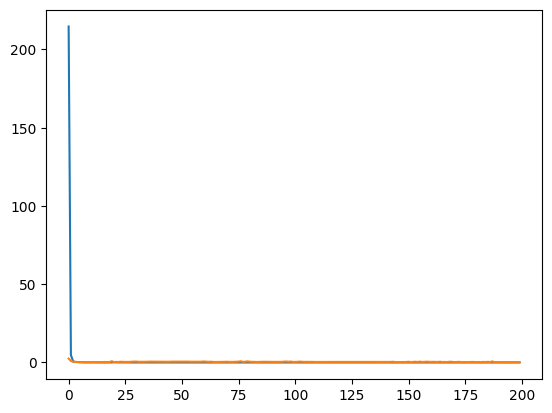

In [35]:
epochs = 200
batch_size = 100

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint(DATASET_PATH + "best_models/" + 'best_model_ex_conv_3.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs = epochs,
    batch_size = batch_size,
    callbacks=[checkpoint]
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

Вывод: лучший результат на тестовой выборке 0.96196

## Модель 4  Тажа мадель 3 с использованием ImageDataGenerator
изменен размер изображений

config

In [96]:
batch_size = 30
epochs = 10
image_size = (128, 256)

Genertor

In [97]:
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Нормализация пикселей
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% на валидацию
)

# Генератора обучающей выборки
train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # два класса
    classes=['iron', 'plastic'],  # Список названий классов
    subset='training'  # для обучения используется только часть данных
)

# Генератора валидационной выборки
validation_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    classes=['iron', 'plastic'],
    subset='validation'  # Используем только часть данных для валидации
)

Found 735 images belonging to 2 classes.
Found 183 images belonging to 2 classes.


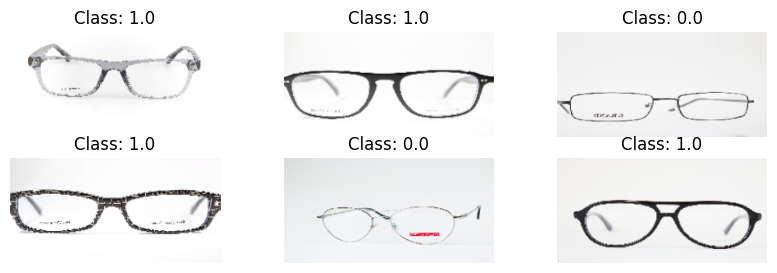

In [98]:
# Получение пакета изображений и меток из генератора
images, labels = next(train_generator)

# Отобразить несколько изображений из пакета
plt.figure(figsize=(10, 3))
for index in range(len(images[:6])):
    plt.subplot(2, 3, index + 1)
    plt.imshow(images[index])
    plt.title('Class: ' + str(labels[index]))
    plt.axis('off')
plt.show()

In [101]:
model = Sequential()

# Первый сверточный слой
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Второй сверточный слой
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Преобразование матрицы признаков в вектор
model.add(Flatten())

# Полносвязные слои
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout для борьбы с переобучением
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 254, 126, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 127, 63, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 125, 61, 64)       18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 62, 30, 64)       0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 119040)            0         
                                                                 
 dense_17 (Dense)            (None, 128)             

Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 1.2371 - accuracy: 0.5901
Epoch 1: val_accuracy improved from -inf to 0.67778, saving model to /content/drive/MyDrive/AI/datasets/plastIron/best_models/best_model_gen_5.h5
24/24 [==============================] - 29s 985ms/step - loss: 1.2371 - accuracy: 0.5901 - val_loss: 0.5114 - val_accuracy: 0.6778
Epoch 2/10
24/24 [==============================] - ETA: 0s - loss: 0.5355 - accuracy: 0.6752
Epoch 2: val_accuracy improved from 0.67778 to 0.82778, saving model to /content/drive/MyDrive/AI/datasets/plastIron/best_models/best_model_gen_5.h5
24/24 [==============================] - 23s 963ms/step - loss: 0.5355 - accuracy: 0.6752 - val_loss: 0.4462 - val_accuracy: 0.8278
Epoch 3/10
24/24 [==============================] - ETA: 0s - loss: 0.4773 - accuracy: 0.7574
Epoch 3: val_accuracy improved from 0.82778 to 0.92778, saving model to /content/drive/MyDrive/AI/datasets/plastIron/best_models/best_model_gen_5.h5
24/24 [===

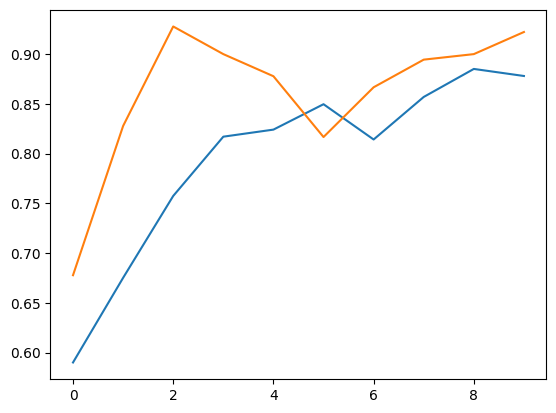

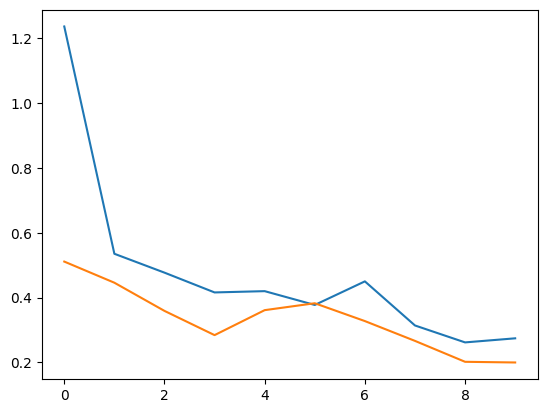

In [102]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint(DATASET_PATH + "best_models/" + 'best_model_gen_5.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint]
)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## Модель 5 Тажа мадель 4
изменение архитектуры сети

config

In [110]:
batch_size = 30
epochs = 20
image_size = (128, 256)

Genertor

In [111]:
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Нормализация пикселей
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% на валидацию
)

# Генератора обучающей выборки
train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # два класса
    classes=['iron', 'plastic'],  # Список названий классов
    subset='training'  # для обучения используется только часть данных
)

# Генератора валидационной выборки
validation_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    classes=['iron', 'plastic'],
    subset='validation'  # Используем только часть данных для валидации
)

Found 735 images belonging to 2 classes.
Found 183 images belonging to 2 classes.


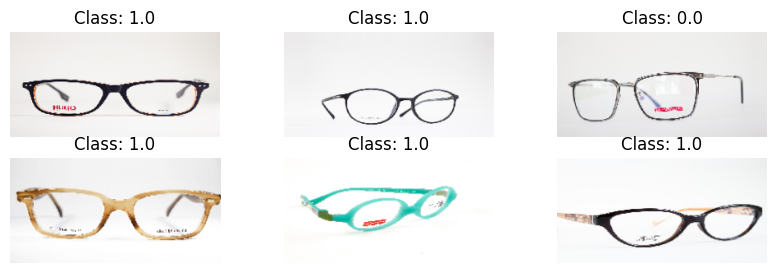

In [112]:
# Получение пакета изображений и меток из генератора
images, labels = next(train_generator)

# Отобразить несколько изображений из пакета
plt.figure(figsize=(10, 3))
for index in range(len(images[:6])):
    plt.subplot(2, 3, index + 1)
    plt.imshow(images[index])
    plt.title('Class: ' + str(labels[index]))
    plt.axis('off')
plt.show()

In [115]:
model = Sequential()

# Первый сверточный слой
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Второй сверточный слой
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Третий сверточный слой
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Преобразование матрицы признаков в вектор
model.add(Flatten())

# Полносвязные слои
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # Dropout для борьбы с переобучением
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Dropout для борьбы с переобучением
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 254, 126, 32)      896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 127, 63, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 125, 61, 64)       18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 62, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 60, 28, 64)        36928     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 30, 14, 64)     

Epoch 1/20
24/24 [==============================] - ETA: 0s - loss: 0.6395 - accuracy: 0.6000
Epoch 1: val_accuracy improved from -inf to 0.78333, saving model to /content/drive/MyDrive/AI/datasets/plastIron/best_models/best_model_gen_6_1.h5
24/24 [==============================] - 31s 1s/step - loss: 0.6395 - accuracy: 0.6000 - val_loss: 0.4486 - val_accuracy: 0.7833
Epoch 2/20
24/24 [==============================] - ETA: 0s - loss: 0.4699 - accuracy: 0.7773
Epoch 2: val_accuracy improved from 0.78333 to 0.85556, saving model to /content/drive/MyDrive/AI/datasets/plastIron/best_models/best_model_gen_6_1.h5
24/24 [==============================] - 35s 1s/step - loss: 0.4699 - accuracy: 0.7773 - val_loss: 0.3254 - val_accuracy: 0.8556
Epoch 3/20
24/24 [==============================] - ETA: 0s - loss: 0.5341 - accuracy: 0.7348
Epoch 3: val_accuracy did not improve from 0.85556
24/24 [==============================] - 29s 1s/step - loss: 0.5341 - accuracy: 0.7348 - val_loss: 0.4195 - va

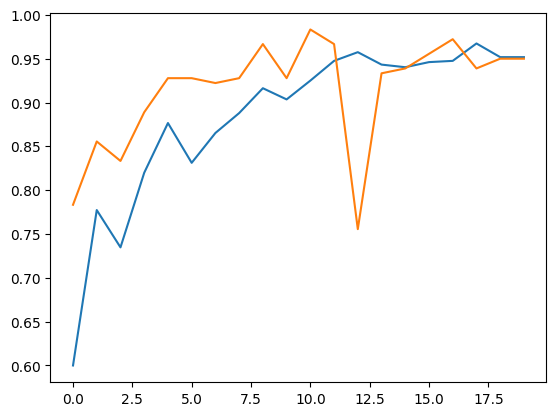

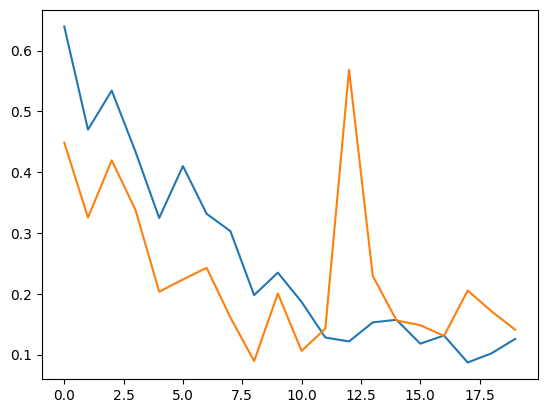

In [116]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint(DATASET_PATH + "best_models/" + 'best_model_gen_6_1.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint]
)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

Вывод


1.   на 10 эпохах 92% перестала обучаться на 8 эпохе
2.   на 20 эпохах 92% перестала обучаться на 8 эпохе
3.   после снижения уровеня потерь с .5 до .3 результ на тестовой выборке **0.98333** и после 11 эпохи не улучшается

Лучший результат 98.333%